In [1]:
import numpy as np
import scipy.io as sio

In [2]:
nips_data = sio.loadmat('/Users/lucasbrunialti/Downloads/nips_1-17.mat')
nips_data

{'__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Sun Jan 16 11:49:33 2005',
 '__version__': '1.0',
 'authors_names': array([[array([u'Aazhang_B'], 
       dtype='<U9'),
         array([u'Abbeel_P'], 
       dtype='<U8'),
         array([u'Abbott_L'], 
       dtype='<U8'), ...,
         array([u'van-den-Bosch_A'], 
       dtype='<U15'),
         array([u'van-der-Merwe_R'], 
       dtype='<U15'),
         array([u'von-zur-Muhlen_A'], 
       dtype='<U16')]], dtype=object),
 'aw_counts': <14036x2865 sparse matrix of type '<type 'numpy.float64'>'
 	with 2302716 stored elements in Compressed Sparse Column format>,
 'counts': <14036x2484 sparse matrix of type '<type 'numpy.uint8'>'
 	with 1304438 stored elements in Compressed Sparse Column format>,
 'docs_authors': <2484x2865 sparse matrix of type '<type 'numpy.uint8'>'
 	with 5879 stored elements in Compressed Sparse Column format>,
 'docs_names': array([[array([u'1987/0001'], 
       dtype='<U9'),
    

In [3]:
words = [w_c[0] for w_c in nips_data['words'][0]]
print 'Num words: %s' % len(words)

Num words: 14036


In [4]:
docs_names = [title[0] for title in nips_data['docs_names'][0]]
print docs_names
print 'Num docs: %s' % len(docs_names)

[u'1987/0001', u'1987/0009', u'1987/0022', u'1987/0031', u'1987/0041', u'1987/0052', u'1987/0062', u'1987/0072', u'1987/0082', u'1987/0095', u'1987/0103', u'1987/0114', u'1987/0127', u'1987/0137', u'1987/0144', u'1987/0154', u'1987/0164', u'1987/0174', u'1987/0184', u'1987/0192', u'1987/0201', u'1987/0211', u'1987/0219', u'1987/0223', u'1987/0233', u'1987/0242', u'1987/0249', u'1987/0262', u'1987/0270', u'1987/0278', u'1987/0290', u'1987/0297', u'1987/0301', u'1987/0310', u'1987/0317', u'1987/0338', u'1987/0348', u'1987/0358', u'1987/0367', u'1987/0377', u'1987/0387', u'1987/0397', u'1987/0402', u'1987/0412', u'1987/0422', u'1987/0432', u'1987/0442', u'1987/0457', u'1987/0467', u'1987/0474', u'1987/0485', u'1987/0495', u'1987/0505', u'1987/0515', u'1987/0524', u'1987/0534', u'1987/0544', u'1987/0554', u'1987/0564', u'1987/0573', u'1987/0584', u'1987/0592', u'1987/0602', u'1987/0612', u'1987/0622', u'1987/0632', u'1987/0642', u'1987/0652', u'1987/0662', u'1987/0674', u'1987/0683', u'198

In [5]:
classes_set = set()
years_set = set()
dist_years = dict()
for n in docs_names:
    try:
        int(n[5:7])
    except:
        if n[5:7].isupper():
            classes_set.add(n[5:7])
            years_set.add(n[:4])
            if n[:4] in dist_years:
                dist_years[n[:4]] = dist_years[n[:4]] + 1
            else:
                dist_years[n[:4]] = 1
print classes_set
print years_set
print dist_years

set([u'AA', u'VB', u'CN', u'SP', u'BI', u'VM', u'AP', u'LT', u'VS', u'IM', u'CS', u'ET', u'NS'])
set([u'2002', u'2003', u'2001'])
{u'2002': 204, u'2003': 197, u'2001': 192}


- AA −> Algorithms & Architectures
- NS −> Neuroscience
- BI −> Brain Imaging
- VS −> Vision
- VM −> Vision (Machine)
- VB −> Vision (Biological)
- LT −> Learning Theory
- CS −> Cognitive Science & AI
- IM −> Implementations
- AP −> Applications
- SP −> Speech and Signal Processing
- CN −> Control & Reinforcement Learning
- ET −> Emerging Technologies

In [6]:
# remove 11, 5, 10, 2
classes = {
 u'AA': 0,
 u'AP': 1,
#  u'BI': 2,
 u'CN': 2,
 u'CS': 3,
#  u'ET': 5,
 u'IM': 4,
 u'LT': 5,
 u'NS': 6,
 u'SP': 7,
#  u'VB': 10,
#  u'VM': 11,
 u'VS': 8
}
classes

{u'AA': 0,
 u'AP': 1,
 u'CN': 2,
 u'CS': 3,
 u'IM': 4,
 u'LT': 5,
 u'NS': 6,
 u'SP': 7,
 u'VS': 8}

In [7]:
indexes_with_label = []
labels = []
for i, name in enumerate(docs_names):
    clasz = name[5:7]
    if clasz in classes:
        if clasz == 'BI' or clasz == 'ET' or clasz == 'VB' or clasz == 'VM': # remove shallow clusters
            continue
        label_num = classes[clasz]

        indexes_with_label.append(i)
        labels.append(label_num)

In [8]:
print len(indexes_with_label)
print len(labels)
print set(labels)

555
555
set([0, 1, 2, 3, 4, 5, 6, 7, 8])


In [9]:
nips_data['counts']

<14036x2484 sparse matrix of type '<type 'numpy.uint8'>'
	with 1304438 stored elements in Compressed Sparse Column format>

In [10]:
data = nips_data['counts'].T
print data.shape
data = data[indexes_with_label, :].toarray()
print data.shape
data

(2484, 14036)
(555, 14036)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [11]:
data.shape

(555, 14036)

In [12]:
d = data.sum(axis=0)
empty_words_inds = np.where(d != 0)[0]
print empty_words_inds.shape
data = data[:, np.where(d != 0)[0]]
data.shape

(6881,)


(555, 6881)

In [13]:
class Dataset(object):

    @classmethod
    def fromdataframe(cls, dataframe):
        s = cls()
        s.__dataframe = dataframe
        s.__target_names = dataframe['channel'].unique().tolist()
        s.__target = s.build_targets()
        s.__data = dataframe['all']
        s.__name = 'ig'
        return s

    @classmethod
    def fromnumpyarray(cls, arr, labels):
        s = cls()
        s.__target = labels
        s.__data = arr
        s.__name = 'nips'
        return s

    def build_targets(self):
        classes_index = list(range(len(self.target_names)))
        target_names_to_index = {k: v for k, v in zip(self.target_names, classes_index)}

        return np.array([target_names_to_index[name] for name in self.dataframe['channel']])

    @property
    def name(self):
        return self.__name

    @property
    def dataframe(self):
        return self.__dataframe

    @property
    def target(self):
        return self.__target

    @property
    def target_names(self):
        return self.__target_names

    @property
    def data(self):
        return self.__data


def get_dataset(dataset_name):
    if dataset_name == 'newsgroup':
        return fetch_20newsgroups(subset='all')
    elif dataset_name == 'ig':
        ig_df = pd.read_pickle('all_news_df.pkl')
        return Dataset.fromdataframe(ig_df)
    elif dataset_name == '':
        arr = pd.read_pickle('nips_data')
        labels = pd.read_pickle('nips_labels')
        return Dataset.fromnumpyarray(arr, labels)

In [14]:
np.save(open('nips_data', 'w+'), data)

In [15]:
np.save(open('nips_labels', 'w+'), labels)

In [16]:
d = Dataset.fromnumpyarray(np.load('nips_data'), np.load('nips_labels'))

In [17]:
d.name

'nips'

In [18]:
d.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
d.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3,

In [20]:
print d.data.shape
print len(d.target)

(555, 6881)
555


In [21]:
dict_classes = {}
for t in d.target:
    if t in dict_classes:
        dict_classes[t] = dict_classes[t] + 1
    else:
        dict_classes[t] = 1
sorted(dict_classes.items(), key=lambda x: x[1])

[(4, 16),
 (7, 26),
 (8, 33),
 (3, 40),
 (1, 47),
 (2, 50),
 (6, 66),
 (5, 68),
 (0, 209)]

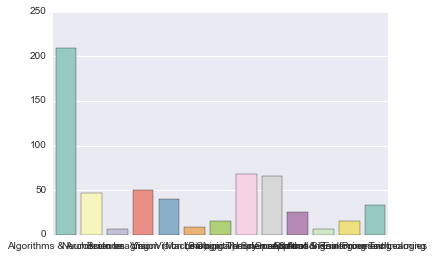

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
names = ['Algorithms & Architectures', 'Neuroscience', 'Brain Imaging', 'Vision',
         'Vision (Machine)', 'Vision (Biological)', 'Learning Theory',
         'Cognitive Science & AI', 'Implementations', 'Applications',
         'Speech and Signal Processing', 'Control & Reinforcement Learning',
         'Emerging Technologies']
cs = [209, 47, 7, 50, 40, 9, 16, 68, 66, 26, 7, 15, 33]
sns.barplot(np.array(names), np.array(cs), palette="Set3")
plt.show()

In [23]:
np.sum(d.data)

746826

In [36]:
import pandas as pd
def get_dataset(dataset_name):
    if dataset_name == 'newsgroup':
        return fetch_20newsgroups(subset='all')
    elif dataset_name == 'ig':
        ig_df = pd.read_pickle('experiments/all_news_df.pkl')
        return Dataset.fromdataframe(ig_df)
    elif dataset_name == 'igtoy':
        arena_news_df = pd.read_pickle('experiments/arena_news_df.pkl')
        sport_news_df = pd.read_pickle('experiments/sport_news_df.pkl')
        jovem_news_df = pd.read_pickle('experiments/jovem_news_df.pkl')
        labels_true = np.array(len(arena_news_df.ix[0:99])*[0] + len(sport_news_df.ix[0:99])*[1] + len(jovem_news_df.ix[0:99])*[2])
        count_vect = CountVectorizer(encoding='UTF-8',lowercase=False, min_df=2)
        X = count_vect.fit_transform(arena_news_df['all'].ix[0:99].tolist() + sport_news_df['all'].ix[0:99].tolist() + jovem_news_df['all'].ix[0:99].tolist())
        return Dataset.fromnumpyarray(X, labels_true)
    elif dataset_name == 'nips':
        arr = np.load('nips_data')
        labels = np.load('nips_labels')
        return Dataset.fromnumpyarray(arr, labels)

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
d_ig = get_dataset('ig')
vectorizer = CountVectorizer(stop_words='english', min_df=2)
X = vectorizer.fit_transform(d_ig.data)
X.sum()

1187334

In [37]:
d_igt = get_dataset('igtoy')
d_igt.data.sum()

70169